<a href="https://colab.research.google.com/github/crescent98/machinelearning35911/blob/master/assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np

file_data   = "mnist.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

In [0]:
#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)


In [0]:
#
# make a matrix each column of which represents an images in a vector form
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector

    count += 1


In [43]:
#
# plot first 150 images out of 10,000 with their labels
#
"""
f1 = plt.figure(1)

for i in range(150):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)


plt.show()
"""

"\nf1 = plt.figure(1)\n\nfor i in range(150):\n\n    label       = list_label[i]\n    im_vector   = list_image[:, i]\n    im_matrix   = im_vector.reshape((size_row, size_col))\n\n    plt.subplot(10, 15, i+1)\n    plt.title(label)\n    plt.imshow(im_matrix, cmap='Greys', interpolation='None')\n\n    frame   = plt.gca()\n    frame.axes.get_xaxis().set_visible(False)\n    frame.axes.get_yaxis().set_visible(False)\n\n\nplt.show()\n"

In [44]:
#
# plot the average image of all the images for each digit
#
"""
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_image):

    im_average[:, list_label[i]] += list_image[:, i]
    im_count[list_label[i]] += 1

for i in range(10):

    im_average[:, i] /= im_count[i]

    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()
"""

"\nf2 = plt.figure(2)\n\nim_average  = np.zeros((size_row * size_col, 10), dtype=float)\nim_count    = np.zeros(10, dtype=int)\n\nfor i in range(num_image):\n\n    im_average[:, list_label[i]] += list_image[:, i]\n    im_count[list_label[i]] += 1\n\nfor i in range(10):\n\n    im_average[:, i] /= im_count[i]\n\n    plt.subplot(2, 5, i+1)\n    plt.title(i)\n    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None')\n\n    frame   = plt.gca()\n    frame.axes.get_xaxis().set_visible(False)\n    frame.axes.get_yaxis().set_visible(False)\n\nplt.show()\n"

In [0]:
image_data=[]
for i in range(0,10000):
  image_data.append(list_image[:, i])
image_data=np.asarray(image_data)

In [0]:
# y 값 구하기
y=[]
for i in range(0,10000):
  temp_zero=np.zeros(10)
  temp_zero[list_label[i]]=1
  y.append(temp_zero)
y=np.asarray(y)

In [0]:
# theta 구하기
theta_1=np.random.normal(0,1.0,(196,785))
theta_2=np.random.normal(0,1.0,(49,197))
theta_3=np.random.normal(0,1.0,(10,50))

In [0]:
# 배열을 받았을 때 vector 곱과 sigmoid 연산
def nextA(x,theta): # x is matrix
  mul=np.matmul(theta,x)
  return 1/(1+np.exp(-mul))


In [0]:
# Variables

# Last Index (마지막 비교용) for testing
last_index=np.zeros(9000)

# Objective 반복문 횟수 만큼
train_objective=np.zeros(5000)
train_accuracy=np.zeros(5000)

test_objective=np.zeros(5000)
test_accuracy=np.zeros(5000)

# other variables
m=1000 #train 은 1000회
alpha=0.3 #가중치
theta_size=np.size(theta_1)+np.size(theta_2)+np.size(theta_3)

In [0]:
alpha=0.1
lamb=1000

In [0]:
i=0

In [34]:
while(train_accuracy[i-1]<99):

  #training
  b_delta4=0
  b_delta3=0
  b_delta2=0

  objective_sum=0

  cor_count=0
  theta_aver=(np.sum(np.square(theta_1))+np.sum(np.square(theta_2))+np.sum(np.square(theta_3)))/theta_size
  #training
  for j in range(0,1000):

    # Forward Propagation

    a1=image_data[j]
    a1_=np.append(np.ones(1),a1)
    a2=nextA(a1_,theta_1)
    a2_=np.append(np.ones(1),a2)
    a3=nextA(a2_,theta_2)
    a3_=np.append(np.ones(1),a3)
    a4=nextA(a3_,theta_3)
    a4_=np.append(np.ones(1),a4)

    # Compute Delta4
    delta_4=a4-y[j]

    # Compute Delta3 , Delta2
    delta_3=np.matmul(np.transpose(theta_3),delta_4)*a3_*(1-a3_)
    delta_2=np.matmul(np.transpose(theta_2),delta_3[1:])*a2_*(1-a2_)

    # Compute(accumulate) big Delta4, Delta3, Delta2
    #np.dot(delta_4.reshape(10,1),a3_.reshape(1,50))
    b_delta4=b_delta4+np.dot(delta_4.reshape(10,1),a3_.reshape(1,50))
    b_delta3=b_delta3+np.dot(delta_3[1:].reshape(49,1),a2_.reshape(1,197))
    b_delta2=b_delta2+np.dot(delta_2[1:].reshape(196,1),a1_.reshape(1,785))

    # Compute(accumulate) Objective
    # L is based on Correct Answer
    objective_sum=objective_sum+np.sum((-y[j]*np.log(a4))-(1-y[j])*np.log(1-a4))

    # Compute the answer
    ans=np.argmax(a4)

    # Last Index
    last_index[j]=ans

    # Compute(accumulate) Accuracy
    if ans==np.argmax(y[j]):
      cor_count=cor_count+1

  #testing
  ans2=0
  cor_count2=0
  objective_sum2=0
  
  # Setting new Theta
  theta_3=theta_3-alpha*(b_delta4/1000+lamb*theta_3/theta_size) #theta_size == n
  theta_2=theta_2-alpha*(b_delta3/1000+lamb*theta_2/theta_size)
  theta_1=theta_1-alpha*(b_delta2/1000+lamb*theta_1/theta_size)

  for j in range(1000,10000): #9000 times

    # Compute a4 for objective (Forward Propagation)

    a1=image_data[j]
    a1_=np.append(np.ones(1),a1)
    a2=nextA(a1_,theta_1)
    a2_=np.append(np.ones(1),a2)
    a3=nextA(a2_,theta_2)
    a3_=np.append(np.ones(1),a3)
    a4=nextA(a3_,theta_3)

    # Computing Objective Function
    objective_sum2=objective_sum2+np.sum((-y[j]*np.log(a4))-(1-y[j])*np.log(1-a4))

    # Compute the answer
    ans2=np.argmax(a4)

    # Compute(accumulate) Accuracy
    if ans2==np.argmax(y[j]):
      cor_count2=cor_count2+1

  #checking objective function
  train_objective[i]=objective_sum/1000+theta_aver*lamb/2
  test_objective[i]=objective_sum2/9000+theta_aver*lamb/2
  
  #checking accuracy
  train_accuracy[i]=cor_count/1000*100
  test_accuracy[i]=cor_count2/9000*100

  #next step
  i=i+1

KeyboardInterrupt: ignored

In [35]:
i

1124

# ***1. Plot the Loss Curve***

*Loss* Curve [0,1000]

train: red test: blue


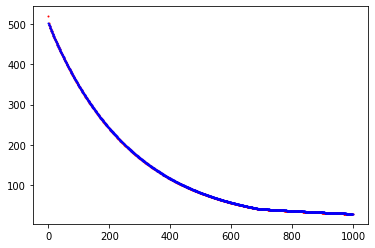

In [39]:
plt.scatter(range(0,1000),train_objective[:1000],c="#ff0000",s=1)
plt.scatter(range(0,1000),test_objective[:1000],c="#0000ff",s=1)
print("train: red test: blue")

*Loss* Curve [1000,i]

train: red test: blue


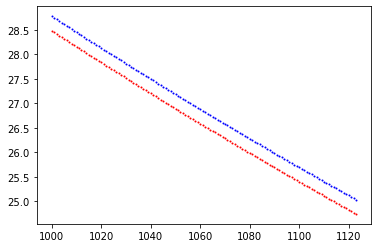

In [40]:
plt.scatter(range(1000,i),train_objective[1000:i],c="#ff0000",s=1)
plt.scatter(range(1000,i),test_objective[1000:i],c="#0000ff",s=1)
print("train: red test: blue")

# ***2. Plot the Accuracy Curve***

train: red 
test: blue


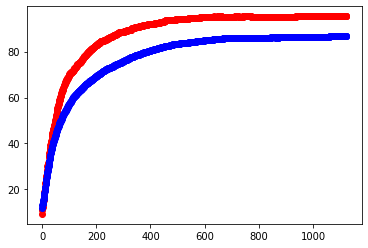

In [37]:
plt.scatter(range(0,i),train_accuracy[:i],c="#ff0000")
plt.scatter(range(0,i),test_accuracy[:i],c="#0000ff")
print("train: red \ntest: blue")

# ***3. Plot the Accuracy Value***

In [38]:
print(train_accuracy[i-1])
print(test_accuracy[i-1])

95.39999999999999
86.62222222222222


# ***4. Plot the Classification Example***

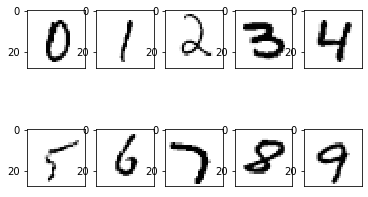

In [19]:
#Correctly
f3=plt.figure(3)
cor=np.zeros(10)
index=0
image_count1=1
for index in range(0,6000):
  if 0 in cor:
    if last_index[index]==list_label[index]:
      cor[int(last_index[index])]=index
  index=index+1

image_count2=1
for index in range(0,10):
  plt.subplot(2,5,image_count2)
  plt.imshow(image_data[int(cor[index])].reshape((size_row,size_col)),cmap='Greys',interpolation='None')
  frame=plt.gca()
  frame.axes.get_xaxis().set_visible(False) 
  image_count2=image_count2+1
plt.show()

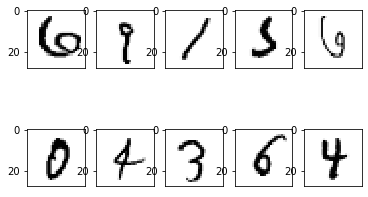

In [20]:
#misclassified
f3=plt.figure(3)
mis=np.zeros(10)
index=0
image_count1=1
for index in range(0,6000):
  if 0 in mis:
    if last_index[index]!=list_label[index]:
      mis[int(last_index[index])]=index

image_count2=1
for index in range(0,10):
  plt.subplot(2,5,image_count2)
  plt.imshow(image_data[int(mis[index])].reshape((size_row,size_col)),cmap='Greys',interpolation='None')
  frame=plt.gca()
  frame.axes.get_xaxis().set_visible(False) 
  image_count2=image_count2+1
plt.show()